# HW 0 - Intro to Pandas
**Submit this notebook to gradescope.**

Credit: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

Read through the below and run the cells to get a feeling for how Pandas works.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Object Creation


Creating a Series by passing a list of values, letting pandas create a default integer index:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [ ]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.159369,-0.099802,0.996220,0.710575
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066
2013-01-06,-1.128097,-1.115742,-0.702814,-0.276980


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [ ]:
df2 = pd.DataFrame({'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                     'D': np.array([3] * 4, dtype='int32'),
                     'E': pd.Categorical(["test", "train", "test", "train"]),
                     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

View the top and bottom rows of the frame:

In [ ]:
df.head()

,A,B,C,D
2013-01-01,-0.159369,-0.099802,0.996220,0.710575
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066


In [ ]:
df.tail(3)

,A,B,C,D
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066
2013-01-06,-1.128097,-1.115742,-0.702814,-0.276980


Display the index, columns:

In [ ]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

In [ ]:
df.values

array([[-0.15936938, -0.09980238,  0.99621955,  0.71057533],
       [-0.28458372, -0.58297182,  0.07350619,  0.6412811 ],
       [ 0.46222038,  0.17344671,  0.39763182,  0.92114935],
       [ 0.70246944, -0.1998469 , -0.02053547, -1.29012306],
       [-0.10879122, -0.2504025 , -0.94805694,  0.66306592],
       [-1.12809694, -1.1157421 , -0.70281434, -0.27698042]])

In [ ]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

.describe( ) shows a quick statistic summary of your data:

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.086025,-0.345886,-0.034008,0.228161
std,0.640864,0.449354,0.713051,0.852423
min,-1.128097,-1.115742,-0.948057,-1.290123
25%,-0.253280,-0.499829,-0.532245,-0.047415
50%,-0.134080,-0.225125,0.026485,0.652174
75%,0.319467,-0.124814,0.316600,0.698698
max,0.702469,0.173447,0.996220,0.921149


Transposing your data:

In [ ]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.159369,-0.284584,0.462220,0.702469,-0.108791,-1.128097
B,-0.099802,-0.582972,0.173447,-0.199847,-0.250403,-1.115742
C,0.996220,0.073506,0.397632,-0.020535,-0.948057,-0.702814
D,0.710575,0.641281,0.921149,-1.290123,0.663066,-0.276980


Sorting by an axis:

In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.710575,0.996220,-0.099802,-0.159369
2013-01-02,0.641281,0.073506,-0.582972,-0.284584
2013-01-03,0.921149,0.397632,0.173447,0.462220
2013-01-04,-1.290123,-0.020535,-0.199847,0.702469
2013-01-05,0.663066,-0.948057,-0.250403,-0.108791
2013-01-06,-0.276980,-0.702814,-1.115742,-1.128097


Sorting by values:

In [ ]:
df.sort_values(by='B')

,A,B,C,D
2013-01-06,-1.128097,-1.115742,-0.702814,-0.276980
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123
2013-01-01,-0.159369,-0.099802,0.996220,0.710575
2013-01-03,0.462220,0.173447,0.397632,0.921149


## Selection

### Getting

Selecting a single column, which yields a Series, equivalent to df.A:

In [ ]:
df['A']

2013-01-01   -0.159369
2013-01-02   -0.284584
2013-01-03    0.462220
2013-01-04    0.702469
2013-01-05   -0.108791
2013-01-06   -1.128097
Freq: D, Name: A, dtype: float64

Selecting via [ ], which slices the rows.

In [ ]:
df[0:3]

,A,B,C,D
2013-01-01,-0.159369,-0.099802,0.996220,0.710575
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149


In [ ]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123


### Selection by label

For getting a cross section using a label:

In [ ]:
df.loc[dates[0]]

A   -0.159369
B   -0.099802
C    0.996220
D    0.710575
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [ ]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.159369,-0.099802
2013-01-02,-0.284584,-0.582972
2013-01-03,0.462220,0.173447
2013-01-04,0.702469,-0.199847
2013-01-05,-0.108791,-0.250403
2013-01-06,-1.128097,-1.115742


Showing label slicing, both endpoints are included:

In [ ]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.284584,-0.582972
2013-01-03,0.462220,0.173447
2013-01-04,0.702469,-0.199847


Reduction in the dimensions of the returned object:

In [ ]:
df.loc['20130102', ['A', 'B']]

A   -0.284584
B   -0.582972
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [ ]:
df.loc[dates[0], 'A']

-0.15936938354360106

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.at[dates[0], 'A']

-0.15936938354360106

### Selection by position

Select via the position of the passed integers:

In [ ]:
df.iloc[3]

A    0.702469
B   -0.199847
C   -0.020535
D   -1.290123
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.702469,-0.199847
2013-01-05,-0.108791,-0.250403


By lists of integer position locations, similar to the numpy/python style:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.284584,0.073506
2013-01-03,0.462220,0.397632
2013-01-05,-0.108791,-0.948057


For slicing rows explicitly:

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.284584,-0.582972,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149


For slicing columns explicitly:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.099802,0.996220
2013-01-02,-0.582972,0.073506
2013-01-03,0.173447,0.397632
2013-01-04,-0.199847,-0.020535
2013-01-05,-0.250403,-0.948057
2013-01-06,-1.115742,-0.702814


For getting a value explicitly:

In [ ]:
df.iloc[1, 1]

-0.5829718231249323

For getting fast access to a scalar (equivalent to the prior method):

In [ ]:
df.iat[1, 1]

-0.5829718231249323

### Boolean Indexing

Selecting values from a DataFrame where a boolean condition is met.

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.996220,0.710575
2013-01-02,NaN,NaN,0.073506,0.641281
2013-01-03,0.462220,0.173447,0.397632,0.921149
2013-01-04,0.702469,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,0.663066
2013-01-06,NaN,NaN,NaN,NaN


Using the isin() method for filtering:

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.159369,-0.099802,0.996220,0.710575,one
2013-01-02,-0.284584,-0.582972,0.073506,0.641281,one
2013-01-03,0.462220,0.173447,0.397632,0.921149,two
2013-01-04,0.702469,-0.199847,-0.020535,-1.290123,three
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066,four
2013-01-06,-1.128097,-1.115742,-0.702814,-0.276980,three


In [ ]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.462220,0.173447,0.397632,0.921149,two
2013-01-05,-0.108791,-0.250403,-0.948057,0.663066,four


### Setting

Setting a new column automatically aligns the data by the indexes.

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F'] = s1

Setting values by label:

In [ ]:
df.at[dates[0], 'A'] = 0

Setting values by position:

In [ ]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [ ]:
df.loc[:, 'D'] = np.array([5] * len(df))

<ipython-input-40-38ea1d699f7d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'D'] = np.array([5] * len(df))


The result of the prior setting operations.

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.996220,5,NaN
2013-01-02,-0.284584,-0.582972,0.073506,5,1.0
2013-01-03,0.462220,0.173447,0.397632,5,2.0
2013-01-04,0.702469,-0.199847,-0.020535,5,3.0
2013-01-05,-0.108791,-0.250403,-0.948057,5,4.0
2013-01-06,-1.128097,-1.115742,-0.702814,5,5.0


A where operation with setting.

In [ ]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.996220,-5,NaN
2013-01-02,-0.284584,-0.582972,-0.073506,-5,-1.0
2013-01-03,-0.462220,-0.173447,-0.397632,-5,-2.0
2013-01-04,-0.702469,-0.199847,-0.020535,-5,-3.0
2013-01-05,-0.108791,-0.250403,-0.948057,-5,-4.0
2013-01-06,-1.128097,-1.115742,-0.702814,-5,-5.0


### Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.996220,5,NaN,1.0
2013-01-02,-0.284584,-0.582972,0.073506,5,1.0,1.0
2013-01-03,0.462220,0.173447,0.397632,5,2.0,NaN
2013-01-04,0.702469,-0.199847,-0.020535,5,3.0,NaN


** To drop any rows that have missing data. **

In [ ]:
df1.dropna()

,A,B,C,D,F,E
2013-01-02,-0.284584,-0.582972,0.073506,5,1.0,1.0


Filling missing data.

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.996220,5,5.0,1.0
2013-01-02,-0.284584,-0.582972,0.073506,5,1.0,1.0
2013-01-03,0.462220,0.173447,0.397632,5,2.0,5.0
2013-01-04,0.702469,-0.199847,-0.020535,5,3.0,5.0


To get the boolean mask where values are nan

In [ ]:
df1.isnull()

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

Performing a descriptive statistic:

In [ ]:
df.mean()

A   -0.059464
B   -0.329253
C   -0.034008
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [ ]:
df.mean(1)

2013-01-01    1.499055
2013-01-02    1.041190
2013-01-03    1.606660
2013-01-04    1.696417
2013-01-05    1.538550
2013-01-06    1.410669
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.537780,-0.826553,-0.602368,4.0,1.0
2013-01-04,-2.297531,-3.199847,-3.020535,2.0,0.0
2013-01-05,-5.108791,-5.250403,-5.948057,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data:

In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.996220,5,NaN
2013-01-02,-0.284584,-0.582972,1.069726,10,1.0
2013-01-03,0.177637,-0.409525,1.467358,15,3.0
2013-01-04,0.880106,-0.609372,1.446822,20,6.0
2013-01-05,0.771315,-0.859775,0.498765,25,10.0
2013-01-06,-0.356782,-1.975517,-0.204049,30,15.0


### Histrogramming

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    1
3    2
4    2
5    6
6    0
7    2
8    6
9    5
dtype: int64

In [ ]:
s.value_counts()

2    3
0    2
5    2
6    2
1    1
dtype: int64

### String Method

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'AaBa', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    AaBa
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [ ]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with concat():

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.554041,1.819310,-0.760252,1.831732
1,0.737515,0.933649,0.047110,0.830570
2,1.478678,-0.291802,0.452511,0.707388
3,1.369125,0.829020,1.965164,1.210251
4,0.629035,0.817867,0.740799,-1.704560
5,0.762615,-0.314556,1.216510,-1.902308
6,-2.181161,0.736552,1.838537,-0.141971
7,-0.364336,1.048950,-0.885021,0.235757
8,-0.661032,0.443768,1.186724,0.767563
9,0.383260,0.739670,-1.536112,0.589527


In [ ]:
# Break it into pieces
pieces = [df[0:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.554041,1.819310,-0.760252,1.831732
1,0.737515,0.933649,0.047110,0.830570
2,1.478678,-0.291802,0.452511,0.707388
7,-0.364336,1.048950,-0.885021,0.235757
8,-0.661032,0.443768,1.186724,0.767563
9,0.383260,0.739670,-1.536112,0.589527


### Join

SQL style merges

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another Example:

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

Append rows to a dataframe.

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.035525,0.046660,1.476975,0.356385
1,0.650000,-0.451045,0.264549,1.080703
2,-0.227501,-0.628831,0.458663,-0.675215
3,-0.147583,-1.033229,0.019412,-1.786899
4,-0.392623,-0.862504,0.556490,0.399691
5,-0.147263,0.244907,0.513290,1.166708
6,-0.582422,-1.230051,1.806441,-1.858918
7,0.741935,1.092879,-0.413341,1.068340


In [ ]:
s = df.iloc[3]
df.append(s, ignore_index=True)

<ipython-input-61-5c75beae9d7c>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,1.035525,0.046660,1.476975,0.356385
1,0.650000,-0.451045,0.264549,1.080703
2,-0.227501,-0.628831,0.458663,-0.675215
3,-0.147583,-1.033229,0.019412,-1.786899
4,-0.392623,-0.862504,0.556490,0.399691
5,-0.147263,0.244907,0.513290,1.166708
6,-0.582422,-1.230051,1.806441,-1.858918
7,0.741935,1.092879,-0.413341,1.068340
8,-0.147583,-1.033229,0.019412,-1.786899


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.098420,1.417315
1,bar,one,0.829466,0.053800
2,foo,two,-0.251390,1.386465
3,bar,three,1.581271,0.273634
4,foo,two,-0.640688,-0.939706
5,bar,two,1.184550,0.289504
6,foo,one,-1.185911,-1.525941
7,foo,three,-2.128775,0.957272


Grouping and then applying the sum() function to the resulting groups.

In [ ]:
df.groupby('A').sum()

<ipython-input-63-180a798bba5b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,3.595286,0.616939
foo,-4.108344,1.295405


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

In [ ]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.829466  0.053800
    three  1.581271  0.273634
    two    1.184550  0.289504
foo one   -1.087491 -0.108626
    three -2.128775  0.957272
    two   -0.892078  0.446759

## Plotting

<Axes: >

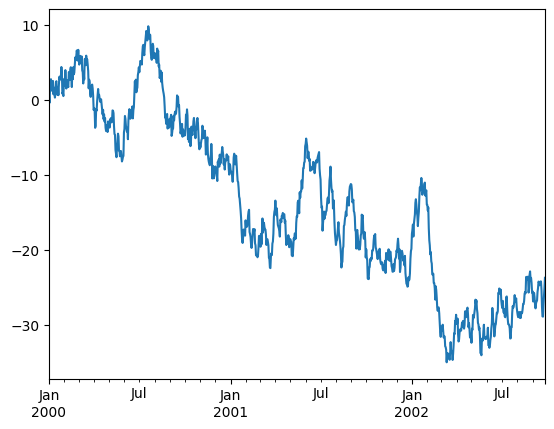

In [ ]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Axes: >

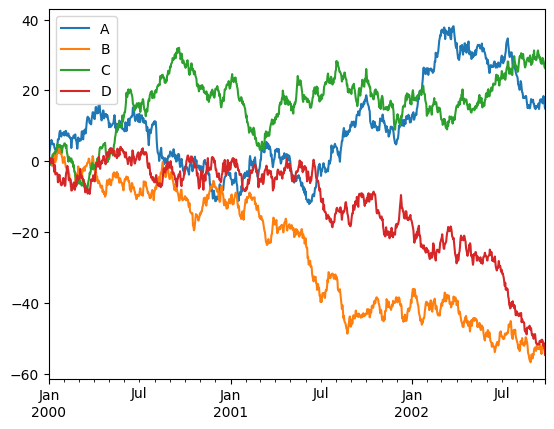

In [ ]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                   columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()

## Getting data in/out

### CSV

In [ ]:
df.to_csv('foo.csv')

In [ ]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.725139,0.963259,0.049076,-0.736992
1,2000-01-02,2.562265,0.109562,1.103480,0.728580
2,2000-01-03,3.497459,-0.995202,0.534811,0.021265
3,2000-01-04,4.665594,-0.285106,-0.847259,-0.413688
4,2000-01-05,4.902819,-1.076785,0.535897,-0.042710


# Your Turn!

Use Pandas to solve these problems.

We have already imported pandas. Now we have a CSV file that we would like to read into a pandas data frame and perform operations on it. We will be using a database of diamonds.

<b> 0) First, read the file. It is located at https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv

In [ ]:
# YOUR CODE HERE

<b> 1) Sample 10 random diamonds and display them.

In [ ]:
# YOUR CODE HERE

<b> 2) Display some statistics (mean, standard deviation, quartiles) about the numerical columns in the data

In [ ]:
# YOUR CODE HERE

<b> 3) For the non-numerical columns, we would like to count how many of one value we have. In other words, pick one of (cut, color, clarity) and count the number of values. You can also display a histogram to get a visual of the distributions.

In [ ]:
# YOUR CODE HERE

Let's say we're building an online store. We want to filter the diamonds based on certain qualities.

<b> 4) Drop the depth, table and x, y, z columns from the data frame.

In [ ]:
# YOUR CODE HERE

<b> 5) Add a new column named `cut_index`. This will be the index of the cut based on the following list:

`[Fair, Good, Very Good, Premium, Ideal]`

So Fair would be 0, Good 1, etc.

In [ ]:
# YOUR CODE HERE

<b> 6) Inflation took on and the prices are rising! Use the `carat` and `cut_index` to calculate a new price. Use the formula:

`new_price = old_price * (1 + cut_index / 10)`

In [ ]:
# YOUR CODE HERE

# Submitting

To submit, download the file as `.ipynb` and upload it to the correct assignment on Gradescope.